# PLEGAMIENTO DE PROTEÍNAS 2D
### Grado Ingeniería del Software - Curso 2021-22
### Búsqueda local: enfriamiento simulado
### Álvaro Úbeda Ruiz y Estefanía Ganfornina Triguero

In [1]:
import matplotlib.pyplot as pl 
import random
from math import e
import time

### Problema 1
Implementar una función get_spatial_dic(protein, structure) que recibe una cadena
representando una proteína (letras de aminoácidos) y otra cadena representando su estructura
(I para el aminoácido inicial, N, S, E o W según la posición relativa de un aminoácido con respecto
al anterior) y devuelve un diccionario o un diccionario vacío si existen solapamientos. Las claves
de dicho diccionario serán tuplas de dos números enteros representando coordenadas
espaciales y los valores serán letras de aminoácidos

In [2]:
def get_spatial_dic(protein,structure):
    if len(protein) == len(structure):
        x = 0
        y = 0
        protein = list(protein)
        structure = list(structure)
        dic = {(x,y):protein[0]}
        coord = {'N':(0,1),'S':(0,-1),'E':(1,0),'W':(-1,0)}
        for i in range(1,len(protein)):
            x += coord[structure[i]][0]
            y += coord[structure[i]][1]
            if((x,y) in dic):
                return {}
            else:
                dic[(x,y)] = protein[i]
        return dic
    else:
        raise NameError('La cadena de proteínas y la estructura no tienen el mismo tamaño.')

Para comprobar el correcto funcionamiento de la función, haremos varias pruebas:

* Caso 1: en el primer caso de prueba podemos ver que se le pasa como parámetros tanto una estructura válida como una proteína válida, por lo que debe devolver el diccionario correctamente. 
* Caso 2: en el segundo caso de prueba se le pasa como parámetro una proteína y una estructura la cual contiene solapamiento, por lo que nos encontramos ante un test negativo, el cual debe devolver un diccionario vacío al contener solapamiento.

Cabe destacar que la función anterior siempre da por hecho que la proteína que se le pasa es correcta, es decir, que todos los aminoácidos existen. Si por ejemplo, añadimos una proteína con aminoácido 'Z', la función lo añadirá sin saber que no existe.

Aunque la función tenga este problema, para nuestro caso no es significativo, ya que, para el uso que le damos, siempre se le pasan tanto proteínas válidas como estructuras válidas.

In [3]:
protein = "ANCEANCE"
structure = "IEENNWNN"
get_spatial_dic(protein,structure)

{(0, 0): 'A',
 (1, 0): 'N',
 (2, 0): 'C',
 (2, 1): 'E',
 (2, 2): 'A',
 (1, 2): 'N',
 (1, 3): 'C',
 (1, 4): 'E'}

In [4]:
protein = "ANCEANCE"
structure = "IEENNWSS"
get_spatial_dic(protein,structure)

{}

### Problema 2.
Se pide implementar las siguientes funciones:
* is_hydrophobic(aa): la cual devuelve true si es hidrofóbica y false en caso contrario
* get_score(dic): que reciba un diccionario representando la estructura espacial de una proteína y devuelva su puntuación. La puntuación de un aminoácido erá ΔG * N (si el aminoácido no es hidrofóbico) y ΔG * N + 10 * N (si el aminoácido es hidrofóbico). Siendo N el número de posiciones adyacentes libres.

In [5]:
aa_deltaG = {'A': 1,'C': 0.17,'D': -3,'E': -2.6,'F': 2.5,'G': 0.67,'H': -1.7,'I': 3.1,'K': -4.6,'L': 2.2,
                 'M': 1.1,'N': -2.7,'P': -0.29,'Q': -2.9,'R': -7.5,'S': -1.1,'T': -0.75,'V': 2.3,'W': 1.5,'Y': 0.08}

A continuación creamos la función is_hydrophobic, la cual devuelve true si el aminoácido correspondiente es hidrofóbico, es decir, si su variación energía es mayor a -1,5 o false en caso contrario

In [6]:
def is_hydrophobic(aa):
    return aa_deltaG[aa]>-1.5

Seguidamente realizamos algunos tests de la función is_hydrophobic(aa), donde:
* Caso 1: en este caso debe devolver false ya que no es hidrofóbica.
* Caso 2: en este caso debe devolver true ya que es hidrofóbica.


In [7]:
test_ej2_case_1 = is_hydrophobic('D') # Test positivo
test_ej2_case_2 = is_hydrophobic('A') # Test positivo 

print(test_ej2_case_1)
print(test_ej2_case_2)

False
True


Una vez comprobado el correcto funcionamiento de la función is_hydrophobic, se implementa la función get_score(dic). 
Para calcular la puntuación de la proteína correspondiente, se recorre el diccionario que se le pasa como parámetro comprobando el número de coordenadas libres que hay alrededor de cada aminoácido con la función auxiliar get_free_adj y calculando su puntuación dependiendo de si es hidrofóbico o no.

In [8]:
def get_free_adj(aa, dic):
    N = 4
    x = aa[0]
    y = aa[1]
    coord = [(0,1),(0,-1),(1,0),(-1,0)]
    for i in coord:
        if (x + i[0], y + i[1]) in dic:
            N -= 1
    return N

In [9]:
def get_score(dic):
    punt = 0
    for aa in dic:
        N = get_free_adj(aa,dic)
        ΔG = aa_deltaG[dic[aa]]
        if is_hydrophobic(dic[aa]):
            punt += ΔG * N + 10 * N
        else:
            punt += ΔG * N
    return punt

Acto seguido realizamos algunos tests de la función get_score(dic) para revisar que funciona correctamente.


In [10]:
dic_ej2_case_3 = get_spatial_dic("ACDE","IWNE") 
test_ej2_case_3 = get_score(dic_ej2_case_3)
print(test_ej2_case_3)

dic_ej2_case_4 = get_spatial_dic("MLKVNEYFAG","IWNEEENEEE") 
test_ej2_case_4 = get_score(dic_ej2_case_4)
print(test_ej2_case_4)

31.140000000000004
138.26999999999998


### Problema 3
Se pide lo siguiente: 
* Se pide implementar una función fold(structure, pos, angle) que recibe una estructura, una posición de plegado (desde donde se comienza a plegar) y el ángulo que puede ser 90 o –90.
* Se pide implementar una función get_successors(protein,structure) que, dada una proteína y su estructura, devuelva un diccionario cuyas claves son todas las posibles estructuras válidas tras aplicar todos los posibles plegamientos y cuyos valores sean los correspondientes diccionarios espaciales obtenidos con get_spatial_dic.

A continuación creamos la función fold que devolverá la estructura tras aplicar el plegado indicado por la posición y el ángulo que se le pasan como parámetros. 
En primer lugar se crea una copia de la estructura inicial que se va actualizando con los valores nuevos tras el plegado. Esta actualización se realiza desde la posición de plegado hasta el final de la estructura y dependerá del ángulo que se haya indicado. 

Si el ángulo es de 90:

* N -> W
* S -> E
* E -> N
* W -> S

Si el ángulo es de -90:

* N -> E
* S -> W
* E -> S
* W -> N


Cabe destacar que si la posición de plegado que recibe es superior a la longitud de la estructura, el resultado sería la estructura inicial dada.

In [11]:
def fold(structure, pos, angle):
    coord = ['N','S','E','W']
    structure = list(structure)
    fold = structure.copy()
    if angle == 90:
        next_coord = {'N':'W','S':'E','E':'N','W':'S'}
    else: 
        next_coord = {'N':'E','S':'W','E':'S','W':'N'}
        
    for i in range(pos,len(structure)):
        fold[i] = next_coord[structure[i]]
    
    return "".join(fold)

La función get_successors va realizando todos los posibles plegamientos desde la posición 1 hasta la última posición de la estructura con ambos ángulos (90 y -90). Tras realizar cada plegamiento obtiene el diccionario espacial y si es válido lo guarda. Finalmente devuelve un diccionario con todos los diccionarios espaciales válidos. 

In [12]:
def get_successors(protein,structure):
    dic = {}
    folds = []
    angle = [-90,90]
    for i in range(1,len(structure)):
        for a in angle:
            f = fold(structure,i,a)
            spatial_dic = get_spatial_dic(protein,f) 
            if(len(spatial_dic)!= 0):
                dic[f] = spatial_dic
    return dic

Seguidamente realizamos algunas pruebas con las funciones fold y get_successors:

In [13]:
test_ej3_case1 = fold('IEEEEEE',4,90)
test_ej3_case2 = fold('IEEEEEE',4,-90)
test_ej3_case3 = fold('IEENNWS',4,-90)
test_ej3_case4 = fold('IEENNWS',5,-90)
test_ej3_case5 = fold('IEENNWS',1,90)

print(test_ej3_case1)
print(test_ej3_case2)
print(test_ej3_case3)
print(test_ej3_case4)
print(test_ej3_case5)

IEEENNN
IEEESSS
IEENENW
IEENNNW
INNWWSE


In [14]:
test_ej3_case6 = get_successors('PEPTIDE', 'IEENWWN')
print(test_ej3_case6)

{'ISSENNE': {(0, 0): 'P', (0, -1): 'E', (0, -2): 'P', (1, -2): 'T', (1, -1): 'I', (1, 0): 'D', (2, 0): 'E'}, 'INNWSSW': {(0, 0): 'P', (0, 1): 'E', (0, 2): 'P', (-1, 2): 'T', (-1, 1): 'I', (-1, 0): 'D', (-2, 0): 'E'}, 'IESENNE': {(0, 0): 'P', (1, 0): 'E', (1, -1): 'P', (2, -1): 'T', (2, 0): 'I', (2, 1): 'D', (3, 1): 'E'}, 'IEEENNE': {(0, 0): 'P', (1, 0): 'E', (2, 0): 'P', (3, 0): 'T', (3, 1): 'I', (3, 2): 'D', (4, 2): 'E'}, 'IEENNNE': {(0, 0): 'P', (1, 0): 'E', (2, 0): 'P', (2, 1): 'T', (2, 2): 'I', (2, 3): 'D', (3, 3): 'E'}, 'IEENWNE': {(0, 0): 'P', (1, 0): 'E', (2, 0): 'P', (2, 1): 'T', (1, 1): 'I', (1, 2): 'D', (2, 2): 'E'}, 'IEENWWW': {(0, 0): 'P', (1, 0): 'E', (2, 0): 'P', (2, 1): 'T', (1, 1): 'I', (0, 1): 'D', (-1, 1): 'E'}}


### Problema 4.
Usando las funciones creadas en los problemas anteriores, implementa el algoritmo de Enfriamiento Simulado (Simmulating Annealing) para resolver el problema del plegado 2D como un problema de optimización.

Para implementar el algoritmo de Enfriamiento Simulado se van a crear dos funciones auxiliares:
    
* initial_state: recibe una proteína y devuelve una estructura inicial.
* get_successor: recibe una proteína y su estructura y aplica un plegamiento aleatorio. Finalmente devuelve la estructura tras el plegamiento y el diccionario espacial de esa proteína.

In [15]:
def initial_state(protein):
    structure = "I"
    i = 1
    for i in range(1,len(protein)):
        structure = structure + "E"
    return structure

In [16]:
def get_successor(protein,structure):
    candidate_dic = {}
    while len(candidate_dic)==0:
        candidate = fold(structure,random.randint(1,len(structure)),random.choice([-90,90]))
        candidate_dic = get_spatial_dic(protein,candidate) 
    return (candidate,candidate_dic)

Tras crear las funciones auxiliares implementaremos el algoritmo de Enfriamiento Simulado. Este recibirá como parámetros la proteína, una temperatura inicial, factor de descenso, número de enfriamientos y número de iteraciones. En primer lugar se crean unas variables:

* temperature: Temperatura actual, al inicio tomará el valor dado como parámetro.
* act_state: Estructura actual, al comienzo del algoritmo su valor será el obtenido por la función initial_state.
* act_value: Puntuación actual, se obtiene de la función get_score con la estructura actual.
* best_state: Mejor estructura hasta el momento.
* best_value: Mejor puntuación hasta el momento. (Estamos minimizando así que el valor será mejor cuanto menor sea)

Se crearán dos bucles uno dentro de otro. El primero se iterará el número de veces indicado por el número de enfriamientos dado como parámetro. Dentro de este, hay otro bucle que se iterará el número de veces indicada en el número de iteraciones. En este segundo bucle, se obtiene un candidato a partir de la función get_successor y se calcula su puntuación. Una vez calculada:

   * Si la puntuación del candidato es menor que la actual: se actualiza la estructura y el valor actual con el del candidato.
   * Si la puntuación del candidato es mayor: se actualizará la estructura y el valor actual de manera probabilística. La probabilidad de que se actualicen los valores actuales será menor a medida que disminuya la temperatura.

Tras esto, se comprueba si el valor actual es mejor que el almacenado en best_value y si es así se actualiza.

Tras la ejecución del bucle interno se disminuye la temperatura con el factor de descenso.

Por último se devuelve el diccionario espacial obtenido a partir del mejor estado.

In [17]:
def simmulating_anneling(protein,ini_temperature,discount_factor, n_enfrent,n_iter):
    ini = time.time()
    temperature = ini_temperature
    act_state = initial_state(protein)
    act_value = get_score(get_spatial_dic(protein,act_state))
    best_state = act_state
    best_value = act_value
    
    for i in range(n_enfrent):
        print(str(i+1)+"- Temperature: "+str(temperature)+" Best score: "+str(best_value))

        for j in range(n_iter):
            successor =  get_successor(protein,act_state)
            candidate = successor[0]
            candidate_value = get_score(successor[1])
            increment = candidate_value - act_value

            if increment < 0:
                act_state = candidate
                act_value = candidate_value
            else:
                q = min(1,pow(e,-increment/temperature))
                if random.randint(0,1) < q:
                    act_state = candidate
                    act_value = candidate_value

            if act_value < best_value:
                best_state = act_state
                best_value = act_value   

        temperature = temperature*discount_factor
    fin = time.time()
    print(fin-ini)
    return get_spatial_dic(protein,best_state)

### Problema 5
Dada una proteína podemos predecir un plegamiento 2D de la misma gracias a los algoritmos implementados durante el desarrollo de este trabajo.
* Se pide probar estos algoritmos con al menos otras tres proteínas sencillas cuya secuencia de aminoácidos y descripción sea extraída desde UNIPROT.
* Se pide hacer una representación gráfica de las estructuras 2D resultante con pyplot. Coloreando de distinto color los aminoácidos dependiendo de si son hidrofóbicos o no.
* Por último, OPCIONALMENTE para optar a nota extra, se pide intentar implementar un gradiente de color dependiendo del valor ΔG del correspondiente aminoácido.

Probamos el algoritmo anterior con tres proteínas diferentes:

La primera proteína será la que tiene como entrada 'Q6LAP7' extraída de https://www.uniprot.org/uniprot/Q6LAP7, llamada "Glucose-6-phosphatase" del organismo del Homo Sapiens (Humano):

In [18]:
Q6LAP7 = 'MEEGMNVLHDFG'
Q6LAP7_dic = simmulating_anneling(Q6LAP7, 100, 0.95, 100, 200)
print(Q6LAP7_dic)

1- Temperature: 100 Best score: 157.64999999999998
2- Temperature: 95.0 Best score: 71.01
3- Temperature: 90.25 Best score: 55.94
4- Temperature: 85.7375 Best score: 55.94
5- Temperature: 81.45062499999999 Best score: 55.94
6- Temperature: 77.37809374999999 Best score: 55.94
7- Temperature: 73.50918906249998 Best score: 55.94
8- Temperature: 69.83372960937498 Best score: 55.94
9- Temperature: 66.34204312890623 Best score: 55.94
10- Temperature: 63.02494097246091 Best score: 55.94
11- Temperature: 59.87369392383786 Best score: 55.94
12- Temperature: 56.880009227645964 Best score: 55.94
13- Temperature: 54.03600876626366 Best score: 55.94
14- Temperature: 51.33420832795048 Best score: 55.94
15- Temperature: 48.76749791155295 Best score: 55.94
16- Temperature: 46.3291230159753 Best score: 55.94
17- Temperature: 44.012666865176534 Best score: 55.94
18- Temperature: 41.812033521917705 Best score: 55.94
19- Temperature: 39.72143184582182 Best score: 55.94
20- Temperature: 37.73536025353073 B

La segunda proteína tiene en Uniprot como nombre de entrada 'P01308', extraída de https://www.uniprot.org/uniprot/P01308, con nombre 'Insulin' y del organismo 'Homo sapiens (Human)':

In [19]:
P01308 = 'MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'
P01308_dic = simmulating_anneling(P01308, 100, 0.95, 500, 500)
print(P01308_dic)

1- Temperature: 100 Best score: 1590.9799999999998
2- Temperature: 95.0 Best score: 1078.42
3- Temperature: 90.25 Best score: 1020.4499999999999
4- Temperature: 85.7375 Best score: 1020.4499999999999
5- Temperature: 81.45062499999999 Best score: 910.62
6- Temperature: 77.37809374999999 Best score: 910.62
7- Temperature: 73.50918906249998 Best score: 910.62
8- Temperature: 69.83372960937498 Best score: 899.7999999999997
9- Temperature: 66.34204312890623 Best score: 896.5899999999993
10- Temperature: 63.02494097246091 Best score: 896.5899999999993
11- Temperature: 59.87369392383786 Best score: 896.5899999999993
12- Temperature: 56.880009227645964 Best score: 896.5899999999993
13- Temperature: 54.03600876626366 Best score: 896.5899999999993
14- Temperature: 51.33420832795048 Best score: 896.5899999999993
15- Temperature: 48.76749791155295 Best score: 896.5899999999993
16- Temperature: 46.3291230159753 Best score: 896.5899999999993
17- Temperature: 44.012666865176534 Best score: 896.589999

128- Temperature: 0.14821694984581216 Best score: 782.5199999999999
129- Temperature: 0.14080610235352153 Best score: 782.5199999999999
130- Temperature: 0.13376579723584545 Best score: 782.5199999999999
131- Temperature: 0.12707750737405316 Best score: 782.5199999999999
132- Temperature: 0.1207236320053505 Best score: 782.5199999999999
133- Temperature: 0.11468745040508296 Best score: 782.5199999999999
134- Temperature: 0.10895307788482882 Best score: 782.5199999999999
135- Temperature: 0.10350542399058738 Best score: 782.5199999999999
136- Temperature: 0.098330152791058 Best score: 782.5199999999999
137- Temperature: 0.09341364515150509 Best score: 782.5199999999999
138- Temperature: 0.08874296289392983 Best score: 782.5199999999999
139- Temperature: 0.08430581474923333 Best score: 782.5199999999999
140- Temperature: 0.08009052401177166 Best score: 782.5199999999999
141- Temperature: 0.07608599781118308 Best score: 714.65
142- Temperature: 0.07228169792062393 Best score: 714.65
143- 

247- Temperature: 0.0003311363832872985 Best score: 427.40999999999997
248- Temperature: 0.00031457956412293353 Best score: 427.40999999999997
249- Temperature: 0.00029885058591678685 Best score: 427.40999999999997
250- Temperature: 0.0002839080566209475 Best score: 427.40999999999997
251- Temperature: 0.0002697126537899001 Best score: 427.40999999999997
252- Temperature: 0.0002562270211004051 Best score: 427.40999999999997
253- Temperature: 0.00024341567004538484 Best score: 427.40999999999997
254- Temperature: 0.00023124488654311558 Best score: 427.40999999999997
255- Temperature: 0.0002196826422159598 Best score: 427.40999999999997
256- Temperature: 0.00020869851010516178 Best score: 427.40999999999997
257- Temperature: 0.00019826358459990368 Best score: 427.40999999999997
258- Temperature: 0.00018835040536990848 Best score: 427.40999999999997
259- Temperature: 0.00017893288510141306 Best score: 427.40999999999997
260- Temperature: 0.0001699862408463424 Best score: 427.4099999999999

362- Temperature: 9.082836766519173e-07 Best score: 427.40999999999997
363- Temperature: 8.628694928193214e-07 Best score: 427.40999999999997
364- Temperature: 8.197260181783553e-07 Best score: 427.40999999999997
365- Temperature: 7.787397172694375e-07 Best score: 427.40999999999997
366- Temperature: 7.398027314059656e-07 Best score: 427.40999999999997
367- Temperature: 7.028125948356673e-07 Best score: 427.40999999999997
368- Temperature: 6.676719650938839e-07 Best score: 427.40999999999997
369- Temperature: 6.342883668391897e-07 Best score: 427.40999999999997
370- Temperature: 6.025739484972302e-07 Best score: 427.40999999999997
371- Temperature: 5.724452510723686e-07 Best score: 427.40999999999997
372- Temperature: 5.438229885187502e-07 Best score: 427.40999999999997
373- Temperature: 5.166318390928127e-07 Best score: 427.40999999999997
374- Temperature: 4.908002471381721e-07 Best score: 427.40999999999997
375- Temperature: 4.662602347812635e-07 Best score: 427.40999999999997
376- T

477- Temperature: 2.49135787823279e-09 Best score: 427.40999999999997
478- Temperature: 2.3667899843211503e-09 Best score: 427.40999999999997
479- Temperature: 2.248450485105093e-09 Best score: 427.40999999999997
480- Temperature: 2.136027960849838e-09 Best score: 427.40999999999997
481- Temperature: 2.029226562807346e-09 Best score: 427.40999999999997
482- Temperature: 1.9277652346669786e-09 Best score: 427.40999999999997
483- Temperature: 1.8313769729336296e-09 Best score: 427.40999999999997
484- Temperature: 1.739808124286948e-09 Best score: 427.40999999999997
485- Temperature: 1.6528177180726006e-09 Best score: 427.40999999999997
486- Temperature: 1.5701768321689705e-09 Best score: 427.40999999999997
487- Temperature: 1.491667990560522e-09 Best score: 427.40999999999997
488- Temperature: 1.4170845910324957e-09 Best score: 427.40999999999997
489- Temperature: 1.3462303614808708e-09 Best score: 427.40999999999997
490- Temperature: 1.2789188434068273e-09 Best score: 427.40999999999997

La tercera proteína tiene en Uniprot la entrada 'A0A6M6B208', con nombre 'Tat protein' y organismo 'Human immunodeficiency virus 1' (https://www.uniprot.org/uniprot/A0A6M6B208):

In [20]:
A0A6M6B208 = "RRQRRSAPPSSEDHQNPIPEQPSPQTRGNSTGSEESKKKVESKTETDPCD"
A0A6M6B208_dic = simmulating_anneling(A0A6M6B208,50,0.95, 200, 200)
print(A0A6M6B208_dic)

1- Temperature: 50 Best score: 279.2600000000001
2- Temperature: 47.5 Best score: 135.48
3- Temperature: 45.125 Best score: 135.48
4- Temperature: 42.86875 Best score: 47.370000000000026
5- Temperature: 40.725312499999994 Best score: 47.370000000000026
6- Temperature: 38.689046874999995 Best score: 47.370000000000026
7- Temperature: 36.75459453124999 Best score: 47.370000000000026
8- Temperature: 34.91686480468749 Best score: 47.370000000000026
9- Temperature: 33.17102156445311 Best score: 47.370000000000026
10- Temperature: 31.512470486230455 Best score: 47.370000000000026
11- Temperature: 29.93684696191893 Best score: 47.370000000000026
12- Temperature: 28.440004613822982 Best score: 47.370000000000026
13- Temperature: 27.01800438313183 Best score: 47.370000000000026
14- Temperature: 25.66710416397524 Best score: 47.370000000000026
15- Temperature: 24.383748955776475 Best score: 47.370000000000026
16- Temperature: 23.16456150798765 Best score: 47.370000000000026
17- Temperature: 22.0

129- Temperature: 0.07040305117676077 Best score: 44.140000000000015
130- Temperature: 0.06688289861792272 Best score: 44.140000000000015
131- Temperature: 0.06353875368702658 Best score: 44.140000000000015
132- Temperature: 0.06036181600267525 Best score: 44.140000000000015
133- Temperature: 0.05734372520254148 Best score: 44.140000000000015
134- Temperature: 0.05447653894241441 Best score: 44.140000000000015
135- Temperature: 0.05175271199529369 Best score: 44.140000000000015
136- Temperature: 0.049165076395529 Best score: 44.140000000000015
137- Temperature: 0.046706822575752545 Best score: 44.140000000000015
138- Temperature: 0.044371481446964914 Best score: 44.140000000000015
139- Temperature: 0.04215290737461667 Best score: 44.140000000000015
140- Temperature: 0.04004526200588583 Best score: 44.140000000000015
141- Temperature: 0.03804299890559154 Best score: 44.140000000000015
142- Temperature: 0.036140848960311965 Best score: 44.140000000000015
143- Temperature: 0.0343338065122

A continuación pasamos a representar en 2D los resultados anteriores.
Para ello, realizaremos una función que pasándole el resultado del algoritmo nos represente la estructura 2D resultante. 

Esta función recorrerá toda la estructura dividiendo los puntos a representar en dos diccionarios dependiendo de si el aminoácido es hidrofóbico o hidrofílico. Posteriormente, representará la estructura completa para que se pueda mostrar la secuencia y, a continuación, se representarán los puntos hidrofóbicos en rojo e hidrofílicos en azul. Para que estos puntos queden por encima de la estructura pintada al inicio se utilizará la propiedad zorder.

In [21]:
def represent(structure,title):
    hydrophobic = {'x':[],'y':[]}
    hydrophilic = {'x':[],'y':[]}
    repres = {'x':[],'y':[]}
    
    for aa in structure:
        repres['x'].append(aa[0])
        repres['y'].append(aa[1])
        #Dividir los puntos en hydrophobic e hydrophilic
        if(is_hydrophobic(structure[aa])):
            hydrophobic['x'].append(aa[0])
            hydrophobic['y'].append(aa[1])
        else:
            hydrophilic['x'].append(aa[0])
            hydrophilic['y'].append(aa[1])

    pl.title("Representación gráfica estructura 2D "+title)
    pl.plot(repres['x'],repres['y'],color='black',zorder=1, alpha = 1,linewidth=2)
    #Se representa de rojo los hydrophobic y de azul los hydrophilic
    pl.plot(hydrophobic['x'], hydrophobic['y'], 'o', c='darkred',zorder=2, label = "Hydrophobic",markersize=12)
    pl.plot(hydrophilic['x'], hydrophilic['y'], 'o', c='darkblue',zorder=2, label = "Hydrophilic",markersize=12)
    leg = pl.legend()
    
    #Mostrar cuadriculas
    pl.grid(linewidth=0.5)
    
    #Mostrar solo valores enteros ejes entre el minimo y el máximo
    pl.xticks([i for i in range(min(repres['x'])-1,max(repres['x'])+2)])
    pl.yticks([i for i in range(min(repres['y'])-1,max(repres['y'])+2)])
    pl.rcParams["figure.figsize"] = (20, 20)
    pl.show()

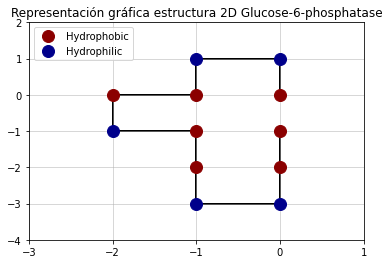

In [22]:
represent(Q6LAP7_dic, "Glucose-6-phosphatase")

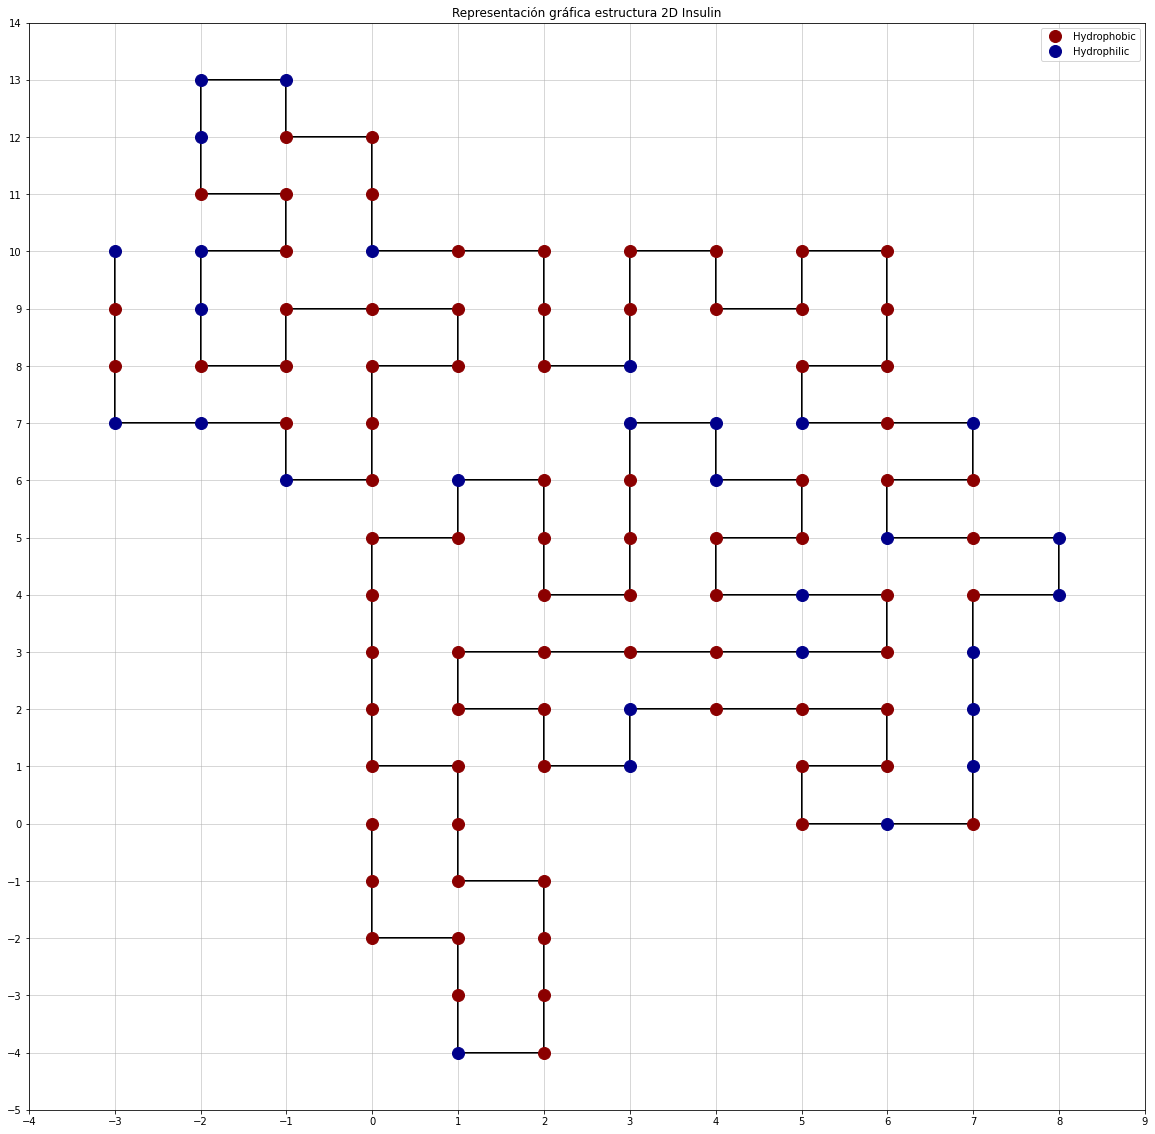

In [23]:
represent(P01308_dic, "Insulin")

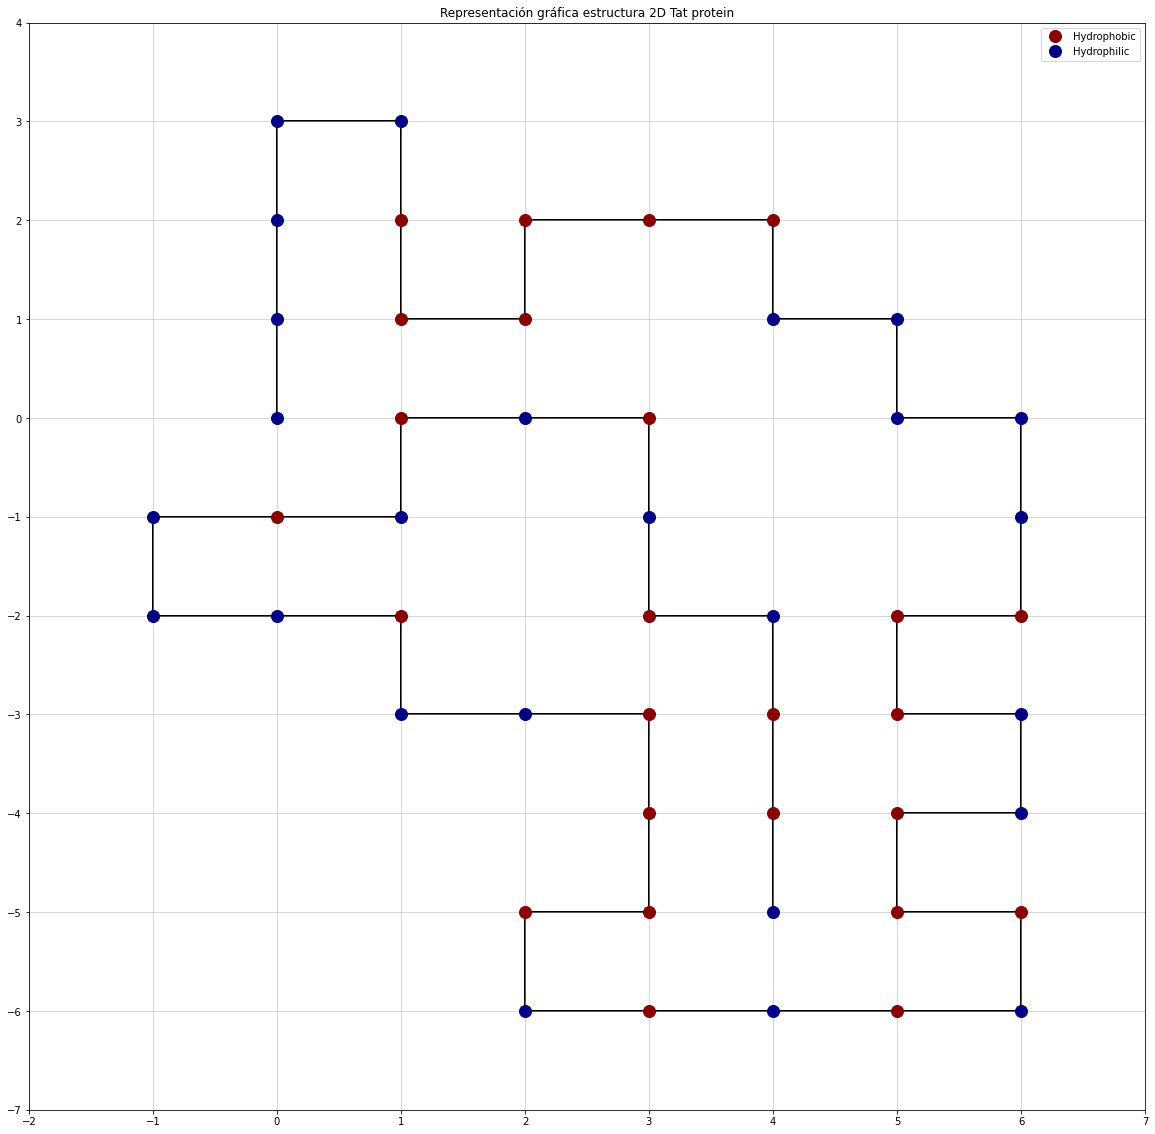

In [24]:
represent(A0A6M6B208_dic, "Tat protein")

Por último, crearemos una función que represente gráficamente la estructura 2D de la proteína coloreando de azul los aminoácidos hidrofílicos y de rojo los hidrofóbicos pero con un gradiente que depende del valor ΔG de cada aminoácido.

Esta función recorrerá toda la estructura separando los puntos a representar en dos diccionarios dependiendo del tipo de aminoácido que sea, al igual que en la función represent, sin embargo, en este diccionario se crearán 3 claves más, minim, maxim y color. Las dos primeras serán para almacenar el valor mínimo y máximo del valor ΔG de cada tipo de aminoácido y, el color, se usará para almacenar todos los valores de ΔG. En el caso de los hidrofóbicos se almacenará el valor ΔG aumentado en 3 unidades para que sean todos los valores positivos y en el de los hidrofílicos se aumentará en 8 unidades.

Tras esto, se representará la estructura completa y se utilizará la propiedad zorder para mostrar los puntos con colores por encima de la estructura base. En este caso se representarán los puntos hidrofóbicos en rojo e hidrofílicos en azul, pero con un gradiente que dependerá de los valores ΔG que se hayan ido almacenando en color. Para ello, se normalizarán estos valores entre 0 y 1 utilizando los valores máximos y mínimos del diccionario de cada tipo de aminoácido.

In [25]:
def represent_grad(structure,title):
    repres = {'x':[],'y':[]}
    hydrophobic = {'minim':10,'maxim':-10,'x':[],'y':[],'color':[]}
    hydrophilic = {'minim':10,'maxim':-10,'x':[],'y':[],'color':[]}

    #Positivos
    for aa in structure:
        repres['x'].append(aa[0])
        repres['y'].append(aa[1])
        deltaG = aa_deltaG[structure[aa]]
        if(is_hydrophobic(structure[aa])):
            if(deltaG+3<hydrophobic['minim']):
                hydrophobic['minim'] = deltaG+3
                
            if(deltaG+3>hydrophobic['maxim']):
                hydrophobic['maxim'] = deltaG+3
                
            hydrophobic['x'].append(aa[0])
            hydrophobic['y'].append(aa[1])
            #Para que sean positivos
            hydrophobic['color'].append(deltaG+3)
        else:
            if(deltaG+8<hydrophilic['minim']):
                hydrophilic['minim'] = deltaG+8
                
            if(deltaG+8>hydrophilic['maxim']):
                hydrophilic['maxim'] = deltaG+8
                
            hydrophilic['x'].append(aa[0])
            hydrophilic['y'].append(aa[1])
            #Para que sean positivos
            hydrophilic['color'].append(deltaG+8)
            
    pl.title("Representación gráfica estructura 2D "+title)
    pl.plot(repres['x'],repres['y'],color='black',zorder=1, alpha = 1,linewidth=2)
    
    if(len(hydrophobic['color'])!=0):
        
        #Normalizar para que estén entre 0 y 1
        for i in range(len(hydrophobic['color'])):
                x = hydrophobic['color'][i]
                divisor = (hydrophobic['maxim']-hydrophobic['minim'])
                if(divisor == 0):
                    hydrophobic['color'][i] = 1
                else:
                    hydrophobic['color'][i] = (x - hydrophobic['minim'])/(hydrophobic['maxim'] - hydrophobic['minim'])

        pl.scatter(hydrophobic['x'],hydrophobic['y'],c=hydrophobic['color'],zorder=2,cmap='Reds',s=60)
        
        #Barra de color Hydrophobic
        cbar1 = pl.colorbar(label = "Hydrophobic", ticks=[0, 1], orientation='vertical')
        cbar1.ax.set_yticklabels([str(hydrophobic['minim']-3), str(hydrophobic['maxim']-3)])
        
    if(len(hydrophilic['color'])!=0):
        
        #Normalizar para que estén entre 0 y 1
        for i in range(len(hydrophilic['color'])):
                x = hydrophilic['color'][i]
                divisor = (hydrophilic['maxim']-hydrophilic['minim'])
                if(divisor == 0):
                    hydrophilic['color'][i] = 1
                else:
                    hydrophilic['color'][i] = (x - hydrophilic['minim'])/(hydrophilic['maxim']-hydrophilic['minim'])
        
        pl.scatter(hydrophilic['x'],hydrophilic['y'],c=hydrophilic['color'],zorder=2,cmap='Blues',s=60)
        
        #Barra de color Hydrophilic
        cbar2 = pl.colorbar(label = "Hydrophilic", ticks=[0, 1], orientation='vertical')
        cbar2.ax.set_yticklabels([str(hydrophilic['minim']-8), str(hydrophilic['maxim']-8)])
        
    #Mostrar cuadriculas
    pl.grid(linewidth=0.5)
    
    #Mostrar solo valores enteros ejes entre el minimo y el máximo
    pl.xticks([i for i in range(min(repres['x'])-1,max(repres['x'])+2)])
    pl.yticks([i for i in range(min(repres['y'])-1,max(repres['y'])+2)])
    pl.rcParams["figure.figsize"] = (20, 20)

    pl.show()

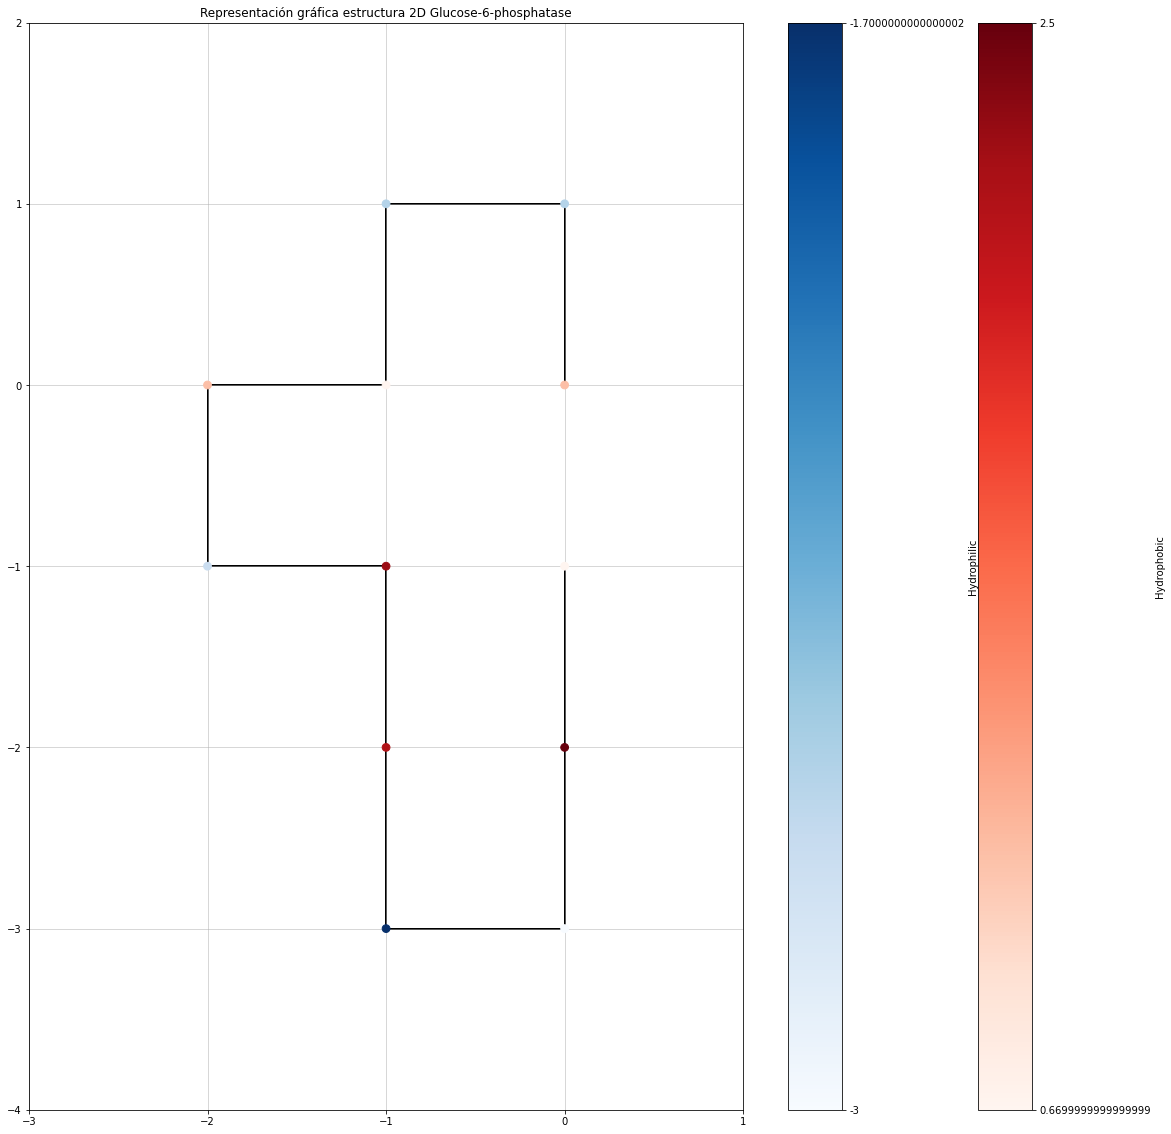

In [26]:
represent_grad(Q6LAP7_dic, "Glucose-6-phosphatase")

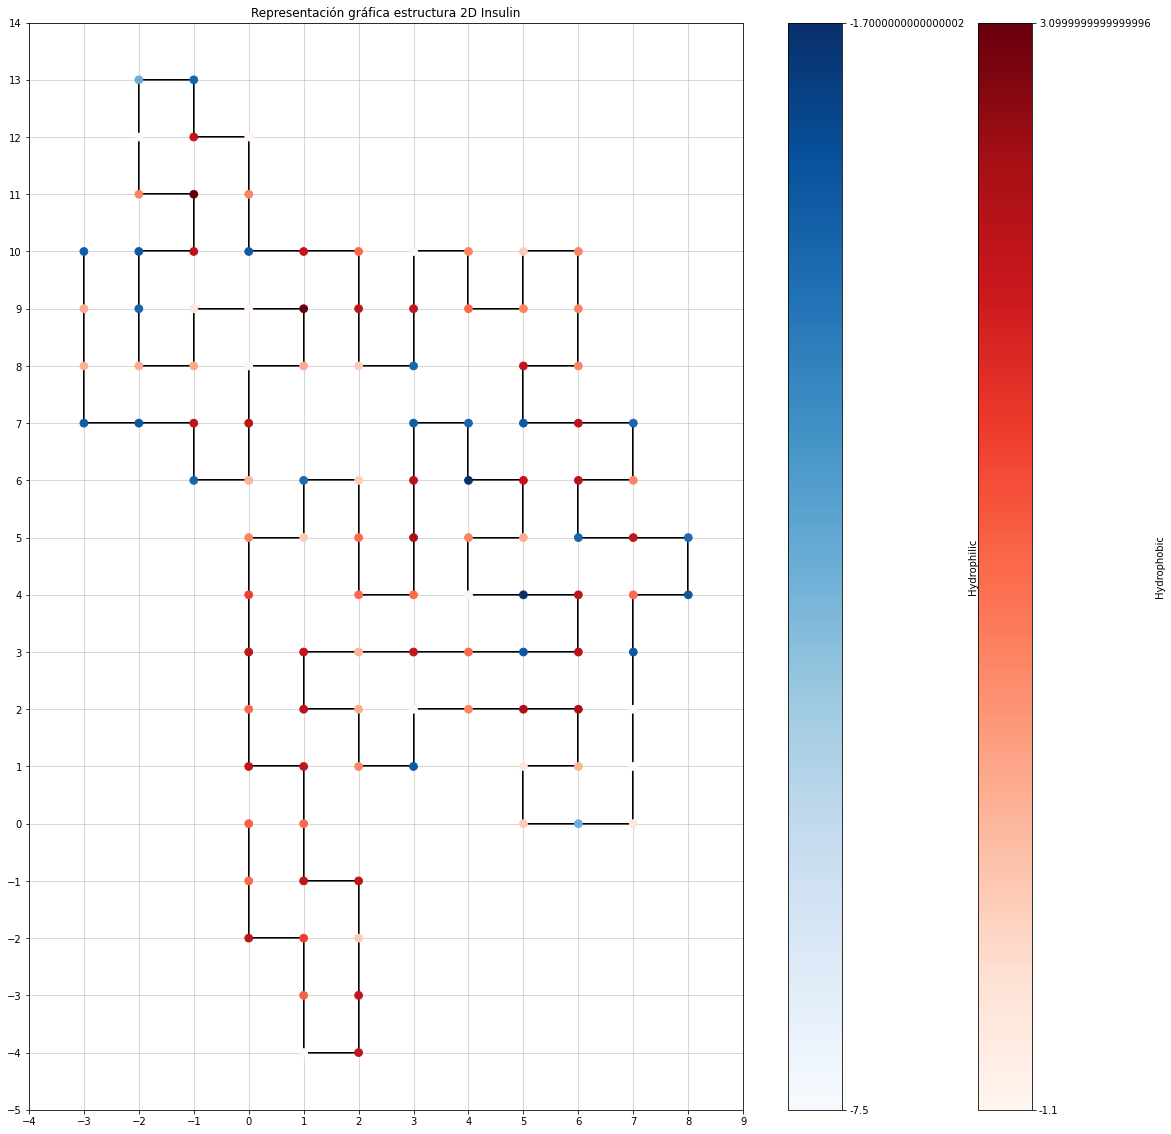

In [27]:
represent_grad(P01308_dic, "Insulin")

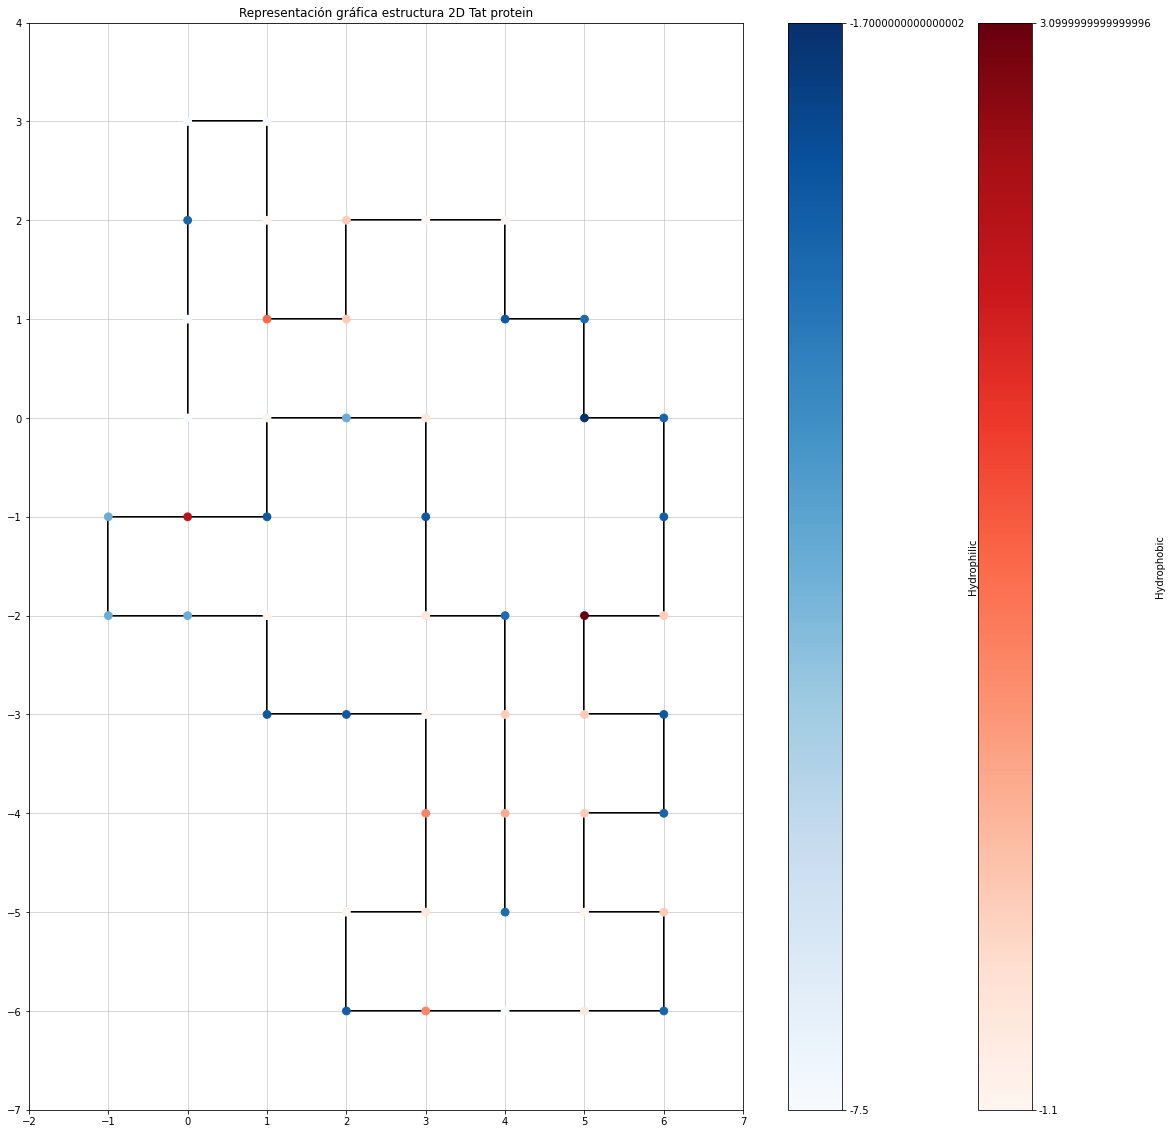

In [28]:
represent_grad(A0A6M6B208_dic, "Tat protein")